In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm

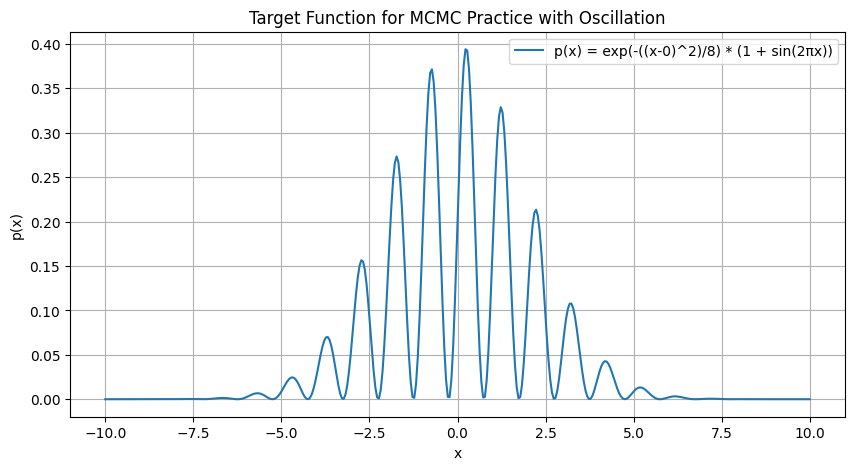

In [2]:
mu = 0
sigma = 2
omega = 2 * np.pi

# Define the target function
x = np.linspace(-10, 10, 400)
p_x = np.exp(-((x - mu)**2) / (2 * sigma**2)) * (1 + np.sin(omega * x))

# Normalize p_x to make it a proper probability density function
p_x /= np.trapz(p_x, x)

# Plot the target function
plt.figure(figsize=(10, 5))
plt.plot(x, p_x, label='p(x) = exp(-((x-0)^2)/8) * (1 + sin(2πx))')
plt.title('Target Function for MCMC Practice with Oscillation')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.legend()
plt.show()

55617
0.55617


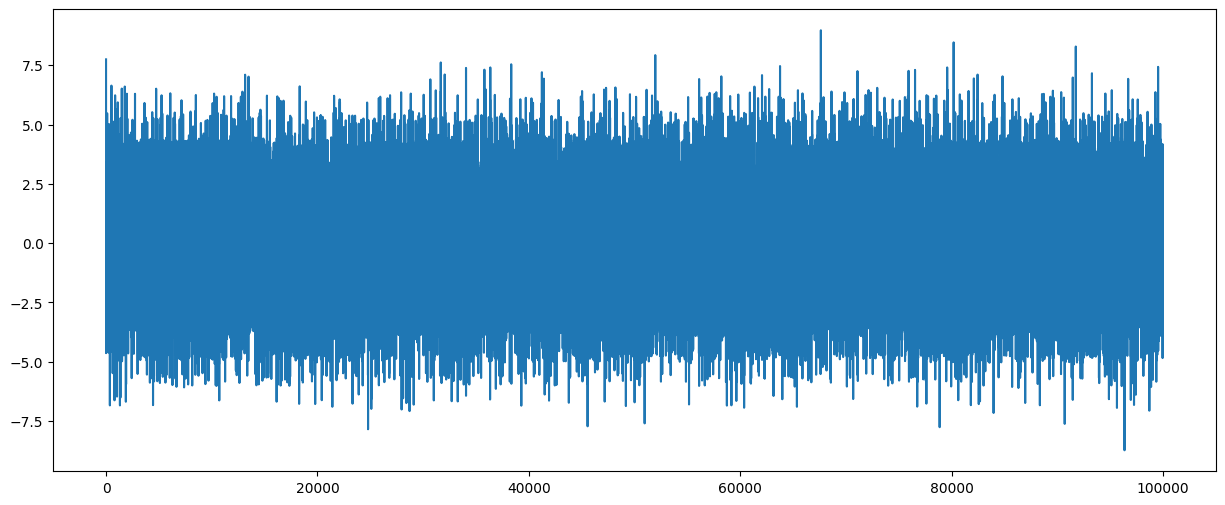

In [37]:
mu0 = 0
tau0 = 2.5

def target_distribution(x):
    return np.exp(-((x - mu)**2) / (2 * sigma**2)) * (1 + np.sin(omega * x))

y0 = np.random.uniform(0, 10)

n = 100000

x = []
x.append(y0)

acceptance_num = 0
 
for t in range(1, n):
    y = np.random.normal(mu0,tau0)
    q_y_given_x = norm.pdf(y, mu0, tau0) ###  normal.density(y|mu0, tau0)
    q_x_given_y = norm.pdf(x[t-1], mu0, tau0) ### normal.density(x|mu0, tau0)
    u = np.random.uniform(0,1)
    logu = np.log(u)
    logalpha = min(0,np.log(target_distribution(y))+np.log((q_x_given_y))-np.log(target_distribution(x[t-1]))-np.log(q_y_given_x))
    #logalpha = min(-(np.sin((100*y)/y)) + np.sin((100*x[t-1])/x[t-1]) - ((y-mu0)**2/2*tau0**2) + ((x[t-1]-mu0)**2/2*tau0**2) ,0) 

    if logu <= logalpha :
        #  x[t] = y
         x.append(y)
         acceptance_num += 1
    else: 
        x.append(x[t-1])



acceptance_rate = acceptance_num / n

# samples.append(current_sample)

print(acceptance_num)
print(acceptance_rate)

plt.figure(figsize=(15, 6))
plt.plot(x)
plt.savefig('time series.png', transparent=False, dpi = 144)
plt.show()

/var/folders/d4/299g0bm11rg1_wj8twkqwp1c0000gn/T/ipykernel_43952/709739200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = x, hist = False)


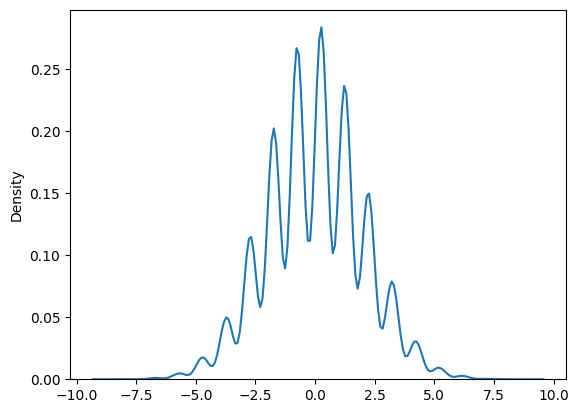

In [38]:
sns.distplot(a = x, hist = False)
plt.savefig('density_Oscillation.png', transparent=False, dpi = 144)
# plt.xlim(-2,10)
# plt.ylim(-1,10)

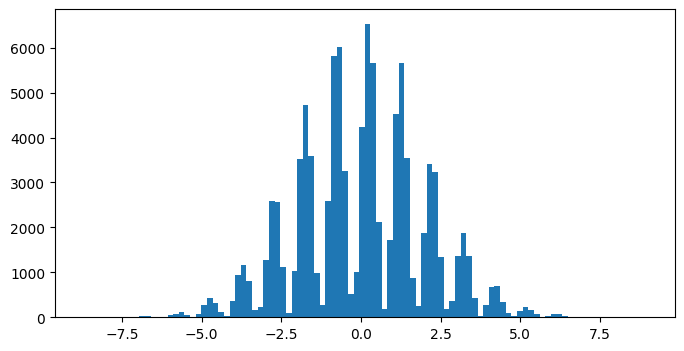

In [39]:
plt.figure(figsize=(8, 4))
plt.hist(x, bins=100,density=False)
plt.savefig('density_hist_Oscillation.png', transparent=False, dpi = 144)
plt.show()

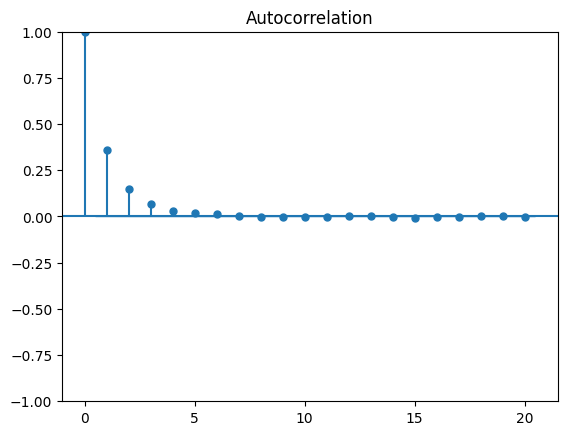

In [40]:
plot_acf(np.array(x), lags = 20)
plt.savefig('ACF_Oscillation.png', transparent=False, dpi = 144)
plt.show()